In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#读数据
df = pd.read_csv('./train.csv',encoding='UTF-8')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
counts=df['count'][:50]

In [5]:
x=np.arange(len(counts))
y=np.array(counts)

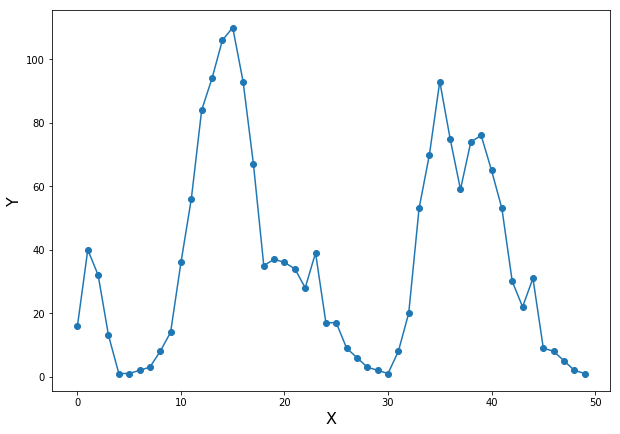

In [6]:
plt.figure(figsize=(10,7))
plt.plot(x,y,marker="o")
plt.xlabel('X',fontsize='16')
plt.ylabel('Y',fontsize='16')
plt.show()

In [7]:
x=Variable(torch.FloatTensor(np.arange(len(counts),dtype=float)/len(counts)))
y=Variable(torch.FloatTensor(np.array(counts,dtype=float)))

In [8]:
sz=10  #设置隐含层神经元数量
weights=Variable(torch.rand(1,sz),requires_grad=True)  #初始化输入层到隐含层的权重矩阵，他的尺寸是(1,10)
biases=Variable(torch.rand(sz),requires_grad=True)      #初始化隐含层节点的偏置向量，他是尺寸为10的一维向量
weights2=Variable(torch.rand(sz,1),requires_grad=True)  #初始化隐含层到输出层的权重矩阵，他的尺寸是(10,1)

In [9]:
learning_rate=0.0001  #设置学习率
losses=[]    #记录每次迭代后的损失函数值
for i in range(100000):
    
    #从输入层到隐含层的计算
    hidden=x.expand(sz,len(x)).t()*weights.expand(len(x),sz)+biases.expand(len(x),sz)
    #将sigmoid函数作用在隐含层的每一个神经元上
    hidden=torch.sigmoid(hidden)
    #隐含层输出到输出层，计算得到最终预测
    predictions=hidden.mm(weights2)
    # 此时，predictions的尺寸为(50,1)，即50个数据点的预测数值
    # 通过与数据中的标准答案y做比较，计算均方误差
    loss=torch.mean((predictions-y)**2)
    #此时，loss为一个标量，即一个数
    losses.append(loss.data.numpy())
    if i%10000==0: #每隔10000个数打印损失函数的值
        print('loss',loss,'当前运行:',i*100/1000000,'%')
    #梯度下降算法,将误差反向传播
    loss.backward()
    #利用上一步计算中得到的weight,biases等梯度信息更新weights,biases的数值
    weights.data.add_(-learning_rate*weights.grad.data)
    if i%10000==0: #每隔10000个数打印损失函数的值
        print('weights.grad.data:',weights.grad.data)
        # print('weights.autograd.data:',weights.autograd.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)
    #清空所有变量的梯度值
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss tensor(1990.3112, grad_fn=<MeanBackward0>) 当前运行: 0.0 %
weights.grad.data: tensor([[-4.0781, -5.3667, -6.6141, -0.6563, -1.9172, -5.5865, -4.6011, -5.7505,
         -5.9866, -5.2043]])


AttributeError: 'Tensor' object has no attribute 'autograd'

Text(0,0.5,'Loss')

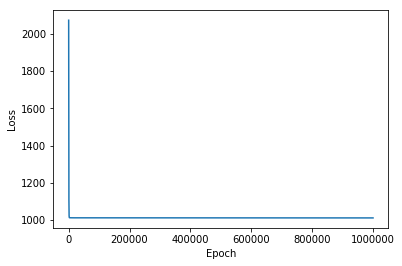

In [10]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

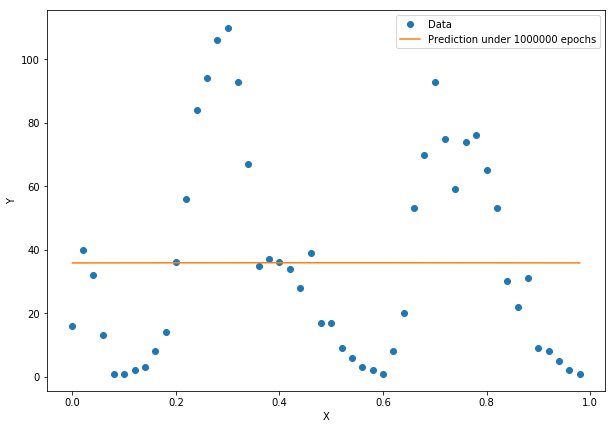

In [11]:
x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot,=plt.plot(x_data,y.data.numpy(),'o')
yplot,=plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction under 1000000 epochs'])
plt.show()

In [15]:
counts_predict=df['count'][50:100]
x=Variable(torch.FloatTensor(np.arange(len(counts_predict),dtype=float)+len(counts))/len(counts))
y=Variable(torch.FloatTensor(np.array(counts_predict,dtype=float)))
hidden=x.expand(sz,len(x)).t()*weights.expand(len(x),sz)
predictions=hidden.mm(weights2)
loss=torch.mean((predictions-y)**2)


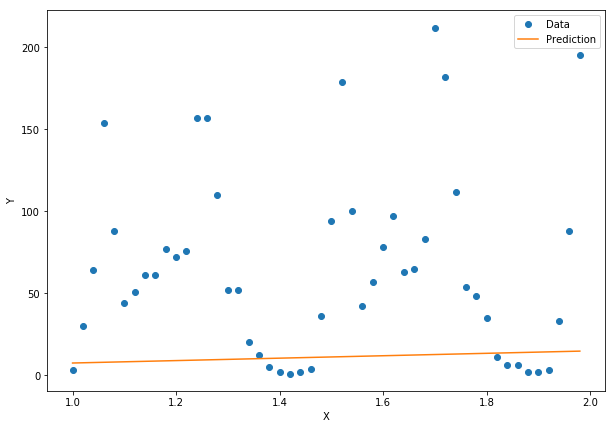

In [16]:
x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot,=plt.plot(x_data,y.data.numpy(),'o')
yplot,=plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction'])
plt.show()